In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from imageio import imread
import cv2
from skimage import transform
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.utils import image_dataset_from_directory, to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
import numpy as np

In [2]:
data_dir = "D:\BSCS\FYP\Mushroom Data - Copy"

In [3]:
data = image_dataset_from_directory(data_dir, image_size=(100, 100), batch_size=32)

Found 63126 files belonging to 4 classes.


In [4]:
data = data.map(lambda x, y : (x/255, y))

In [5]:
len(data)

1973

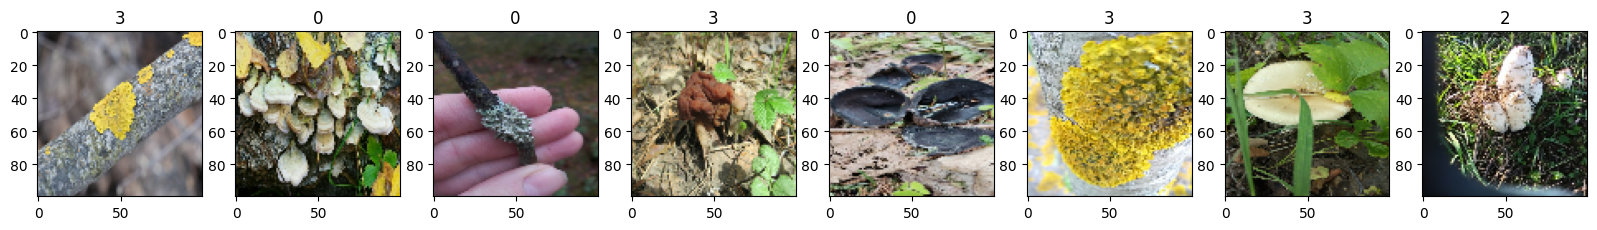

In [6]:
batch = data.as_numpy_iterator().next()
fig, ax = plt.subplots(ncols=8, figsize=(20,20))
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

# Conditionally Edible = Class 0
# Deadly = Class 1
# Edible = Class 2
# Poisonous = Class 3

In [7]:
train_data = data.take(50)
val_data = data.skip(50).take(10)
test_data = data.skip(60).take(9)

In [8]:
len(train_data)

50

In [9]:
len(val_data)

10

In [10]:
len(test_data)

9

In [11]:
model = Sequential([
        Conv2D(64, (7, 7), activation="relu", input_shape=(100, 100, 3)),
        MaxPooling2D(),
        Conv2D(32, (5, 5), activation="relu"),
        MaxPooling2D(),
        Conv2D(16, (3, 3), activation="relu"),
        MaxPooling2D(),
        Flatten(),
        Dense(16, activation="relu"),
        Dropout(0.5),
        Dense(4, activation="softmax")
    ])

model.compile(metrics=["accuracy"], loss="sparse_categorical_crossentropy", optimizer="adam")

In [12]:
model.fit(train_data, validation_data = val_data, epochs=5)

Epoch 1/5


50/50 [==============================] - 27s 505ms/step - loss: 1.3279 - accuracy: 0.3169 - val_loss: 1.2594 - val_accuracy: 0.3406
Epoch 2/5
 6/50 [==>...........................] - ETA: 15s - loss: 1.3102 - accuracy: 0.2969

KeyboardInterrupt: 

In [ ]:
model.evaluate(test_data, verbose=2)

9/9 - 7s - loss: 0.9722 - accuracy: 0.5868 - 7s/epoch - 776ms/step


[0.9722397923469543, 0.5868055820465088]

In [ ]:
model.save("Mushrooms Model.h5")

c:\Users\zainu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model = load_model("Mushrooms Model.h5")

TypeError: Image data of dtype object cannot be converted to float

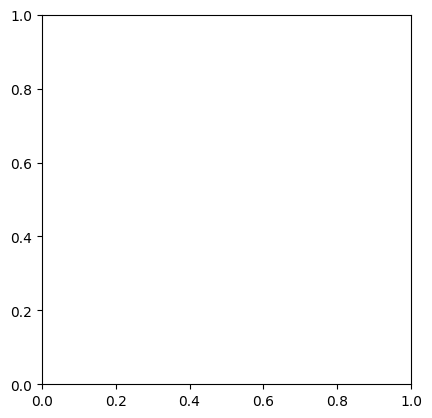

In [ ]:
a = cv2.imread("deadly.jpg")
imshow(a)

b = transform.resize(a, (100,100))
prediction = model.predict(b.reshape(1,100,100,3))
print(prediction)
if prediction < 0.5:
    print("It's edible")
else:
    print("It's Deadly")

1/1 [==============================] - 0s 25ms/step
[[0.4994418]]
It's edible


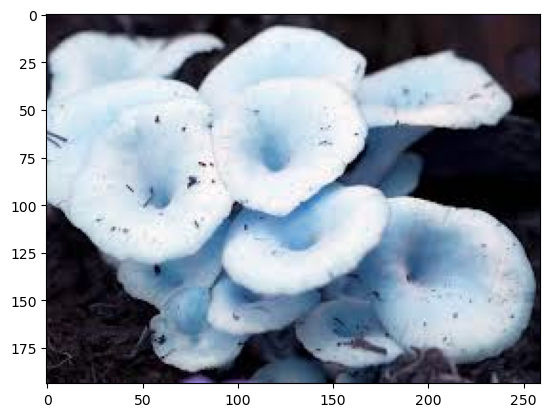

In [ ]:
a = cv2.imread("edible.jpg")
imshow(a)

b = transform.resize(a, (100,100))
prediction = model.predict(b.reshape(1,100,100,3))
print(prediction)
if prediction < 0.5:
    print("It's edible")
else:
    print("It's Deadly")